In [22]:
# -------------------------Import neccessary lib----------------------------- #
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [23]:
sns.set_theme(style='whitegrid', palette='colorblind')

## EDA

In [24]:
df = pd.read_csv("cars_feature_engineered.csv")

In [25]:
# quick derive fields
df['age'] = 2025 - df['year']

In [26]:
make_count = df['make'].value_counts()
state_count = df['state'].value_counts()

print(f"Number of manufacturers : \n {make_count}")
print(f"Number of states : \n {state_count}")

Number of manufacturers : 
 make
Ford             81013
Chevrolet        54150
Nissan           44043
Toyota           35313
Dodge            27181
Honda            24781
Hyundai          18659
BMW              17509
Kia              15828
Chrysler         15133
Infiniti         14011
Mercedes-Benz    14008
Jeep             12735
Volkswagen       10780
Lexus            10409
GMC               9217
Mazda             6930
Cadillac          6315
Lincoln           4926
Audi              4802
Acura             4503
Buick             4470
Subaru            4369
Ram               4044
Pontiac           4018
Mitsubishi        3661
Volvo             3082
MINI              2946
Saturn            2570
Mercury           1571
Scion             1545
Land Rover        1322
Jaguar            1257
Porsche           1157
Suzuki             977
HUMMER             768
FIAT               725
Saab               416
smart              343
Oldsmobile         318
Isuzu              179
Maserati           109
B

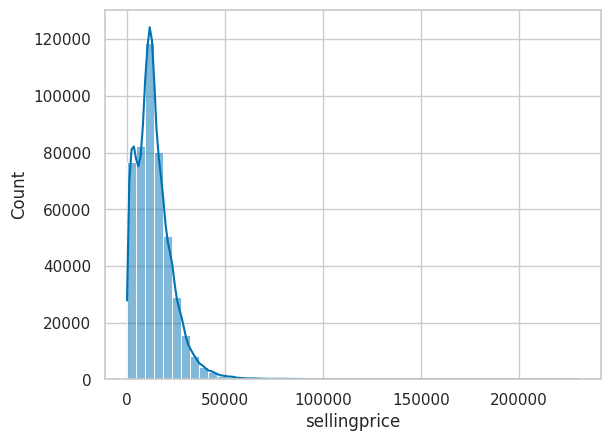

count    472325.000000
mean      13690.512058
std        9613.033738
min           1.000000
25%        7200.000000
50%       12200.000000
75%       18200.000000
max      230000.000000
Name: sellingprice, dtype: float64


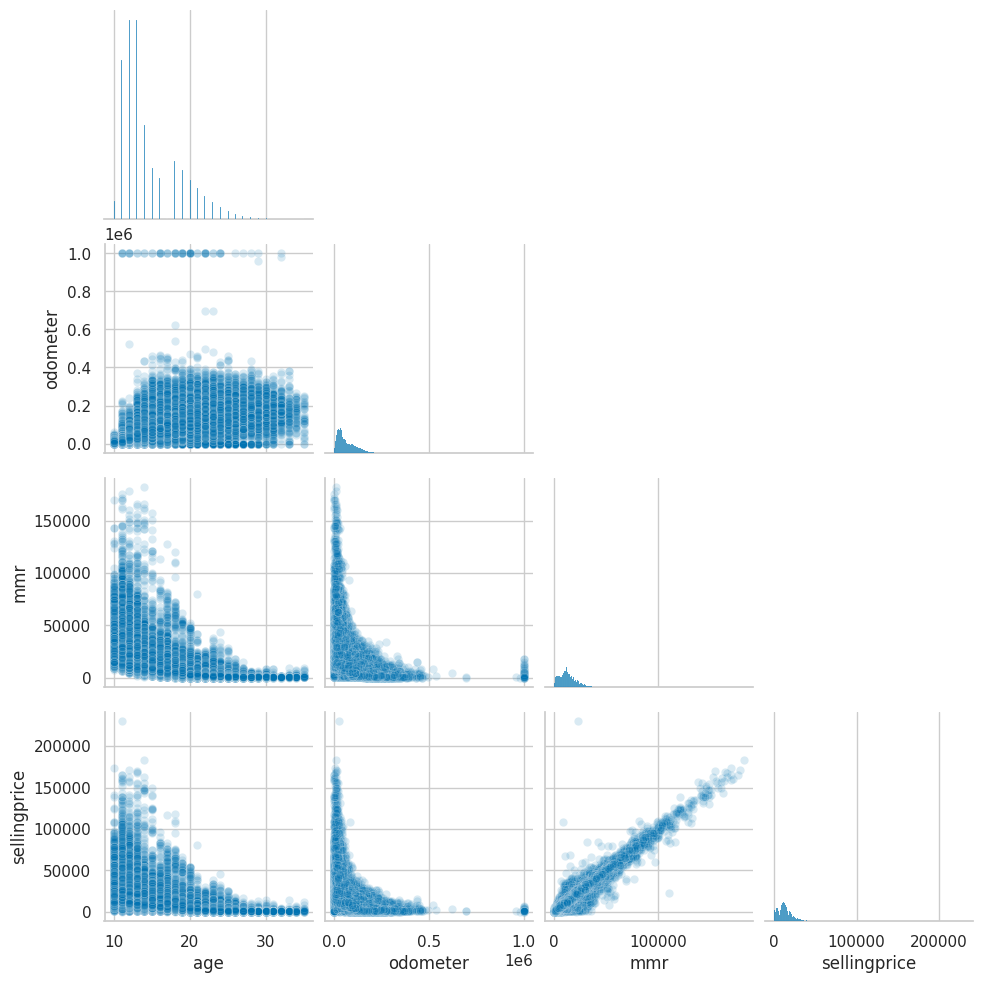

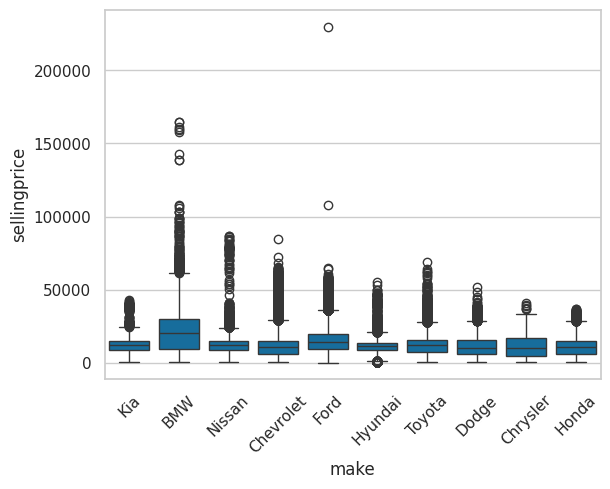

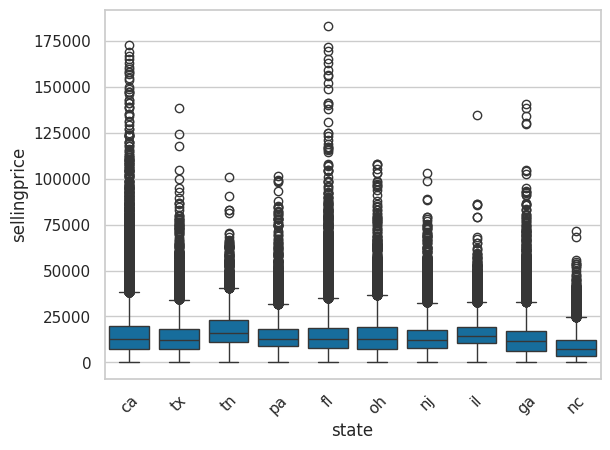

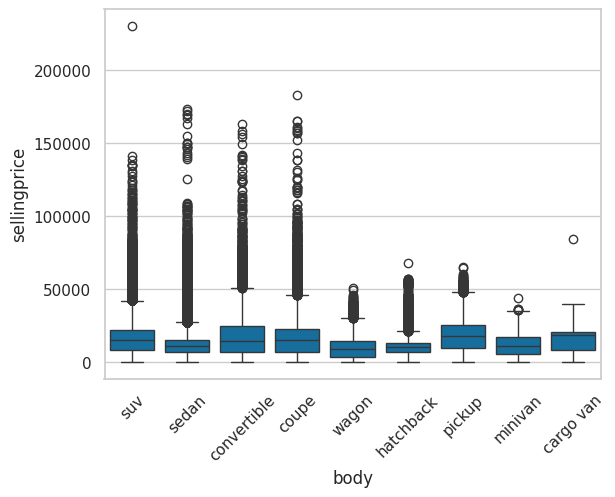

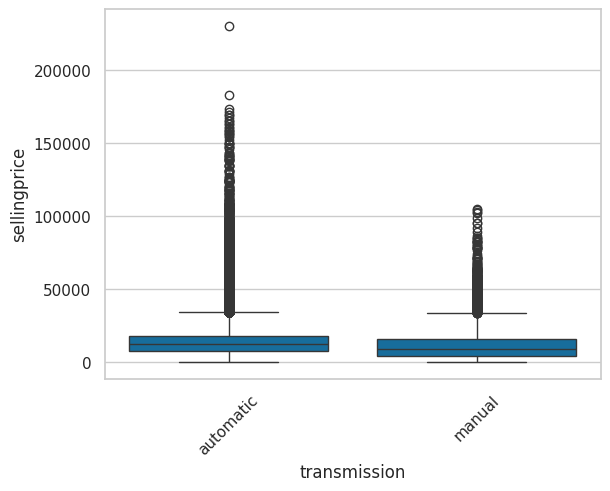

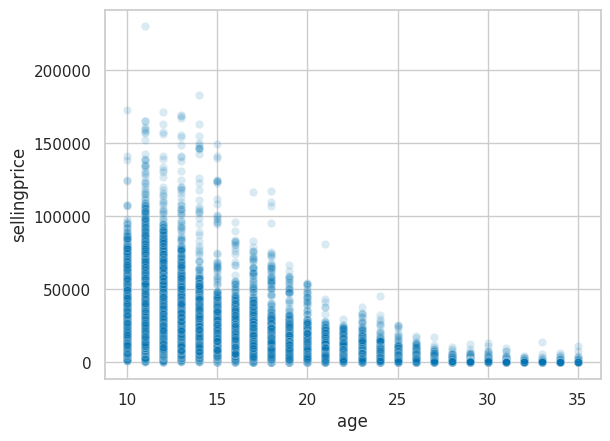

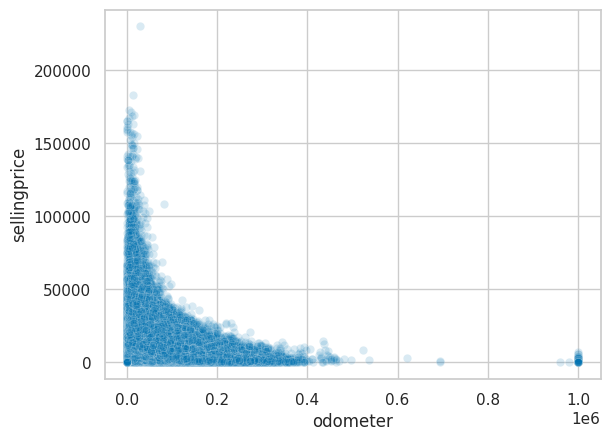

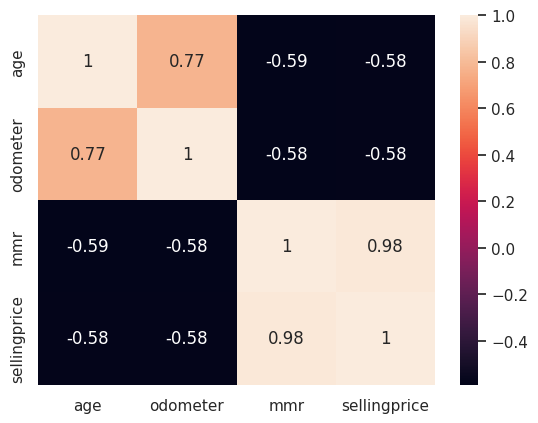

In [27]:

# 1. target
sns.histplot(df['sellingprice'], bins=50, kde=True)
plt.show()
print(df['sellingprice'].describe())

# 2. numeric
num = ['age','odometer','mmr','sellingprice']
sns.pairplot(df[num], corner=True, plot_kws={'alpha':.15})
plt.show()

# 3. categorical vs price
for col in ['make','state','body','transmission']:
    top = df[col].value_counts().head(10).index
    sns.boxplot(x=col, y='sellingprice', data=df[df[col].isin(top)])
    plt.xticks(rotation=45); plt.show()

# 4. age vs price
sns.scatterplot(data=df, x='age', y='sellingprice', alpha=.15)
plt.show()

# 5. mileage vs price
sns.scatterplot(data=df, x='odometer', y='sellingprice', alpha=.15)
plt.show()

# 6. correlation
corr = df[num].corr()
sns.heatmap(corr, annot=True); plt.show()

In [28]:
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,...,mmr,sellingprice,saledate,price_diff,car_age,mileage_per_year,sale_year,sale_month,sale_day,age
0,2015,Kia,Sorento,LX,suv,automatic,5xyktca69fg566472,ca,5.0,16639.0,...,20500.0,21500.0,2014-12-16 04:30:00+00:00,1000.0,10,1663.900000,2014,12,16,10
1,2015,Kia,Sorento,LX,suv,automatic,5xyktca69fg561319,ca,5.0,9393.0,...,20800.0,21500.0,2014-12-16 04:30:00+00:00,700.0,10,939.300000,2014,12,16,10
2,2014,BMW,3 Series,328i SULEV,sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,...,31900.0,30000.0,2015-01-14 20:30:00+00:00,-1900.0,11,121.000000,2015,1,14,11
3,2015,Volvo,S60,T5,sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,...,27500.0,27750.0,2015-01-28 20:30:00+00:00,250.0,10,1428.200000,2015,1,28,10
4,2014,BMW,6 Series Gran Coupe,650i,sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,...,66000.0,67000.0,2014-12-18 04:30:00+00:00,1000.0,11,240.090909,2014,12,18,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472320,2011,BMW,5 Series,528i,sedan,automatic,wbafr1c53bc744672,fl,39.0,66403.0,...,20300.0,22800.0,2015-07-06 23:15:00+00:00,2500.0,14,4743.071429,2015,7,6,14
472321,2012,Ram,2500,Power Wagon,pickup,automatic,3c6td5et6cg112407,wa,5.0,54393.0,...,30200.0,30800.0,2015-07-08 02:30:00+00:00,600.0,13,4184.076923,2015,7,8,13
472322,2012,BMW,X5,xDrive35d,suv,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,...,29800.0,34000.0,2015-07-08 02:30:00+00:00,4200.0,13,3889.307692,2015,7,8,13
472323,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,...,15100.0,11100.0,2015-07-08 23:45:00+00:00,-4000.0,10,1665.800000,2015,7,8,10
